In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc

In [2]:
df = pd.read_csv('/home/ubuntu/MIMICmaterialized/oasis.csv')

# Create dataframe with icustay_id and icustay_expire_flag
df_flag = df[['icustay_id', 'icustay_age_group','icustay_expire_flag']].copy()

In [3]:
saps = pd.read_csv('/home/ubuntu/MIMICmaterialized/saps.csv')
lods = pd.read_csv('/home/ubuntu/MIMICmaterialized/lods.csv')

In [4]:
print("SAPS")

# Merge two dataframes on icustay_id	
saps_merged = saps.merge(df_flag, on='icustay_id')

# keep only adult cases
saps_adult = saps_merged.loc[saps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
saps_adult_dropped = saps_adult.dropna().copy()

# create dataframe based on computed scores
saps_final = saps_adult_dropped[['age_score', 'hr_score', 'resp_score', 'sysbp_score',  \
				'temp_score', 'uo_score', 'vent_score', 'bun_score', \
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', \
				'sodium_score', 'bicarbonate_score', 'gcs_score', \
                                 'icustay_expire_flag']].copy()

# create target variable
y_saps = saps_final.pop('icustay_expire_flag')

# create X variable
X_saps = saps_final.copy()

# train-test split	
X_train_saps, X_test_saps, y_train_saps, y_test_saps = train_test_split(X_saps, y_saps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_saps)
# Train and fit model                                                   
rf_saps = GradientBoostingClassifier( random_state=0)

rf_saps.fit(X_train_saps, y_train_saps)

# Test Prediction
pred_saps = rf_saps.predict(X_test_saps)
print('Accuracy score: {:.3}'.format(rf_saps.score(X_test_saps, y_test_saps)))

# Get predicted probabilites 	
y_predict_proba_saps = rf_saps.predict_proba(X_test_saps)

# Get predicted probabilites of 1 (Death)
y_proba_saps = y_predict_proba_saps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_saps, y_proba_saps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_saps = sum(y_test_saps)/sum(pred_saps)
print('SMR: {:.3}'.format(SMR_saps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_saps = y_proba_saps - y_test_saps
squared_saps = np.square(difference_saps)
Brier_saps = np.mean(squared_saps)
print('Brier Score: {:.3}'.format(Brier_saps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_saps, tpr_saps, threshold = roc_curve(y_test_saps, y_proba_saps)
roc_auc_saps = auc(fpr_saps, tpr_saps)


SAPS
Accuracy score: 0.926
AUROC: 0.851
SMR: 3.21
Brier Score: 0.0582


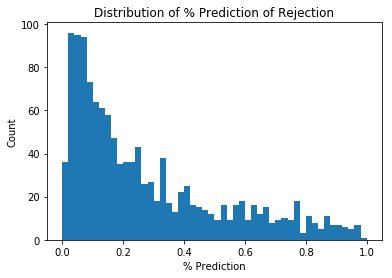

In [5]:
import matplotlib.pyplot as plt

plt.hist(y_proba_saps[y_test_saps==1],range=[0,1], bins=50)
plt.xlabel('% Prediction')
plt.ylabel('Count')
plt.title('Distribution of % Prediction of Rejection')
plt.show()

In [6]:
# Merge two dataframes on icustay_id	
lodsYsaps = lods.merge(df_flag, on='icustay_id')

lodsYsaps_merged = lodsYsaps.merge(saps, on='icustay_id')

In [7]:

# keep only adult cases
lodsYsaps_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps_adult_dropped = lodsYsaps_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps_final = lodsYsaps_adult_dropped[['neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)


Accuracy score: 0.926
AUROC: 0.864
SMR: 2.88
Brier Score: 0.0579


In [10]:
rf_lodsYsaps

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

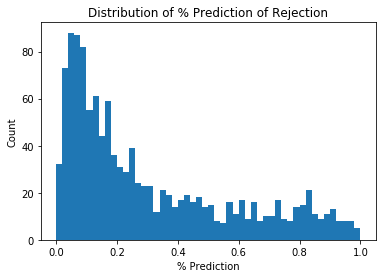

In [9]:
plt.hist(y_proba_lodsYsaps[y_test_lodsYsaps==1],range=[0,1], bins=50)
plt.xlabel('% Prediction')
plt.ylabel('Count')
plt.title('Distribution of % Prediction of Rejection')
plt.show()

In [12]:
# Merge two dataframes on icustay_id	
lodsYsaps = lods.merge(df, on='icustay_id')

lodsYsaps_merged = lodsYsaps.merge(saps, on='icustay_id')

In [17]:
lodsYsaps_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61532 entries, 0 to 61531
Data columns (total 55 columns):
subject_id_x             61532 non-null int64
hadm_id_x                61532 non-null int64
icustay_id               61532 non-null int64
lods                     61532 non-null int64
neurologic               52143 non-null float64
cardiovascular           59052 non-null float64
renal                    49589 non-null float64
pulmonary                61532 non-null int64
hematologic              59300 non-null float64
hepatic                  50748 non-null float64
subject_id_y             61532 non-null int64
hadm_id_y                61532 non-null int64
icustay_age_group        61532 non-null object
hospital_expire_flag     61532 non-null int64
icustay_expire_flag      61532 non-null int64
oasis                    61532 non-null int64
oasis_prob               61532 non-null float64
age                      61532 non-null int64
age_score_x              61532 non-null int64
prei

In [18]:

# keep only adult cases
lodsYsaps_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps_adult_dropped = lodsYsaps_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps_final = lodsYsaps_adult_dropped[[ 'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)


Accuracy score: 0.927
AUROC: 0.875
SMR: 2.71
Brier Score: 0.057


In [19]:

# keep only adult cases
lodsYsaps_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps_adult_dropped = lodsYsaps_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps_final = lodsYsaps_adult_dropped[['age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)


Accuracy score: 0.927
AUROC: 0.876
SMR: 2.68
Brier Score: 0.0569


In [22]:

# keep only adult cases
lodsYsaps1_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps1_adult_dropped = lodsYsaps1_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps1_final = lodsYsaps1_adult_dropped[['age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps1 = lodsYsaps1_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps1 = lodsYsaps1_final.copy()

# train-test split	
X_train_lodsYsaps1, X_test_lodsYsaps1, y_train_lodsYsaps1, y_test_lodsYsaps1 = train_test_split(X_lodsYsaps1, \
                                                y_lodsYsaps1, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps1)
# Train and fit model                                                   
rf_lodsYsaps1 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps1.fit(X_train_lodsYsaps1, y_train_lodsYsaps1)

# Test Prediction
pred_lodsYsaps1 = rf_lodsYsaps1.predict(X_test_lodsYsaps1)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps1.score(X_test_lodsYsaps1, y_test_lodsYsaps1)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps1 = rf_lodsYsaps1.predict_proba(X_test_lodsYsaps1)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps1 = y_predict_proba_lodsYsaps1[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps1, y_proba_lodsYsaps1)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps1 = sum(y_test_lodsYsaps1)/sum(pred_lodsYsaps1)
print('SMR: {:.3}'.format(SMR_lodsYsaps1))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps1 = y_proba_lodsYsaps1 - y_test_lodsYsaps1
squared_lodsYsaps1 = np.square(difference_lodsYsaps1)
Brier_lodsYsaps1 = np.mean(squared_lodsYsaps1)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps1))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps1, tpr_lodsYsaps1, threshold = roc_curve(y_test_lodsYsaps1, y_proba_lodsYsaps1)
roc_auc_lodsYsaps1 = auc(fpr_lodsYsaps1, tpr_lodsYsaps1)


Accuracy score: 0.927
AUROC: 0.876
SMR: 2.68
Brier Score: 0.0569


In [23]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['oasis','lods','saps','age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)


Accuracy score: 0.927
AUROC: 0.872
SMR: 2.74
Brier Score: 0.057


In [25]:
lodsYsaps2_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53431 entries, 0 to 61531
Data columns (total 55 columns):
subject_id_x             53431 non-null int64
hadm_id_x                53431 non-null int64
icustay_id               53431 non-null int64
lods                     53431 non-null int64
neurologic               52142 non-null float64
cardiovascular           52297 non-null float64
renal                    49419 non-null float64
pulmonary                53431 non-null int64
hematologic              52544 non-null float64
hepatic                  48384 non-null float64
subject_id_y             53431 non-null int64
hadm_id_y                53431 non-null int64
icustay_age_group        53431 non-null object
hospital_expire_flag     53431 non-null int64
icustay_expire_flag      53431 non-null int64
oasis                    53431 non-null int64
oasis_prob               53431 non-null float64
age                      53431 non-null int64
age_score_x              53431 non-null int64
prei

In [26]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                            'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.926
AUROC: 0.87
SMR: 2.88
Brier Score: 0.0578


In [27]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods','age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                            'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.925
AUROC: 0.872
SMR: 2.78
Brier Score: 0.0574


In [29]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods',\
                                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', 
                                            'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.927
AUROC: 0.871
SMR: 2.66
Brier Score: 0.0575


In [30]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods', 'saps', 'oasis',\
                                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', 
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.926
AUROC: 0.867
SMR: 2.82
Brier Score: 0.058


In [31]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods', 'saps', \
                                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', 
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.925
AUROC: 0.868
SMR: 2.86
Brier Score: 0.0582


In [32]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods', 'saps', \
                                              'age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', 
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.925
AUROC: 0.867
SMR: 2.98
Brier Score: 0.0584


In [33]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods', 'saps', 'oasis', \
                                              
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.922
AUROC: 0.85
SMR: 3.78
Brier Score: 0.0612


In [34]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[['lods', 'saps', 'oasis', \
                                             'age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y',
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.926
AUROC: 0.873
SMR: 2.71
Brier Score: 0.0571


In [35]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[[ 
                                             'age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y',
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.927
AUROC: 0.877
SMR: 2.71
Brier Score: 0.0569


In [37]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [38]:

# keep only adult cases
lodsYsaps2_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps2_adult_dropped = lodsYsaps2_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps2_final = lodsYsaps2_adult_dropped[[ 
                                             'age_score_x', 'preiculos_score', 'gcs_score_x', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score_x','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                                              'age', 'gcs', 'heartrate', 'meanbp', \
		 'resprate', 'temp', 'urineoutput', 'mechvent','electivesurgery', \
                                           'neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score_y', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score_y', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score_y',
                                             'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps2 = lodsYsaps2_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps2 = lodsYsaps2_final.copy()

# train-test split	
X_train_lodsYsaps2, X_test_lodsYsaps2, y_train_lodsYsaps2, y_test_lodsYsaps2 = train_test_split(X_lodsYsaps2, \
                                                y_lodsYsaps2, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps2)
# Train and fit model                                                   
rf_lodsYsaps2 = XGBClassifier(random_state=0)
XGBClassifier(random_state=0)
rf_lodsYsaps2.fit(X_train_lodsYsaps2, y_train_lodsYsaps2)

# Test Prediction
pred_lodsYsaps2 = rf_lodsYsaps2.predict(X_test_lodsYsaps2)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps2.score(X_test_lodsYsaps2, y_test_lodsYsaps2)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps2 = rf_lodsYsaps2.predict_proba(X_test_lodsYsaps2)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps2 = y_predict_proba_lodsYsaps2[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps2, y_proba_lodsYsaps2)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps2 = sum(y_test_lodsYsaps2)/sum(pred_lodsYsaps2)
print('SMR: {:.3}'.format(SMR_lodsYsaps2))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps2 = y_proba_lodsYsaps2 - y_test_lodsYsaps2
squared_lodsYsaps2 = np.square(difference_lodsYsaps2)
Brier_lodsYsaps2 = np.mean(squared_lodsYsaps2)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps2))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps2, tpr_lodsYsaps2, threshold = roc_curve(y_test_lodsYsaps2, y_proba_lodsYsaps2)
roc_auc_lodsYsaps2 = auc(fpr_lodsYsaps2, tpr_lodsYsaps2)



Accuracy score: 0.928
AUROC: 0.876
SMR: 3.01
Brier Score: 0.0567


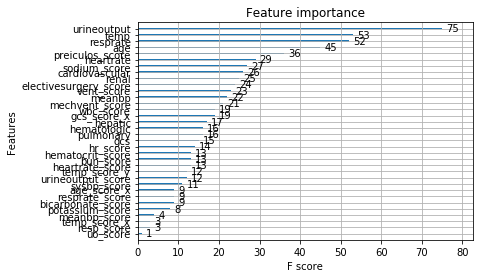

In [39]:
plot_importance(rf_lodsYsaps2)
plt.show()